In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


In [2]:
# Read the data
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
print(df.head())

# Correlation analysis (numeric features only)
print(df.corr(numeric_only=True))

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)               

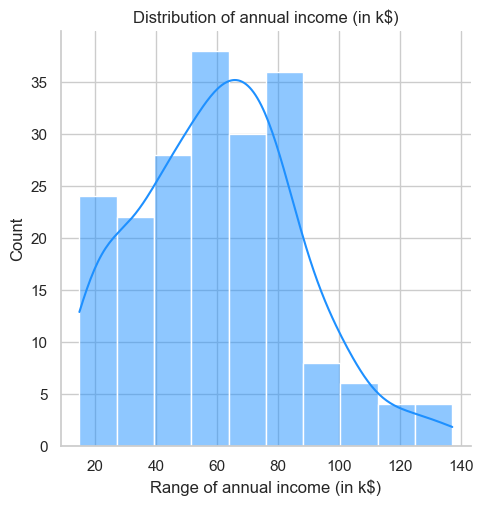

In [3]:
# Distribution of annual income
sns.set(style="whitegrid")
sns.displot(df["Annual Income (k$)"], kde=True, color="dodgerblue")
plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")
plt.savefig('displot.svg')
plt.show()

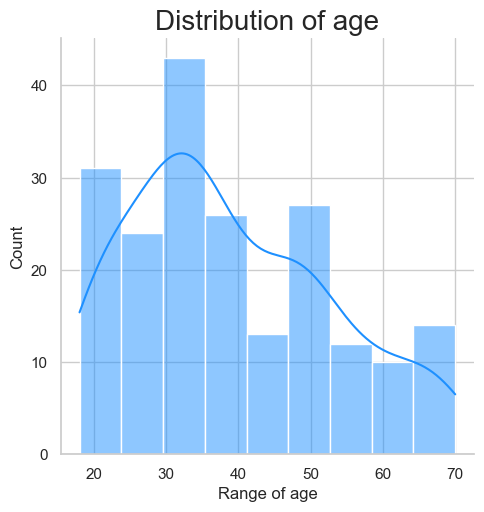

In [4]:
# Distribution of age
sns.set(style="whitegrid")
sns.displot(df["Age"], kde=True, color="dodgerblue")
plt.title('Distribution of age', fontsize=20)
plt.xlabel('Range of age')
plt.ylabel('Count')
plt.savefig('displot.svg')
plt.show()

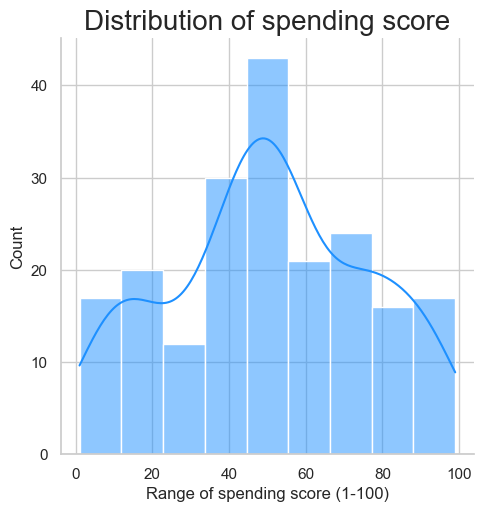

In [5]:
# Distribution of spending score
sns.set(style="whitegrid")
sns.displot(df["Spending Score (1-100)"], kde=True, color="dodgerblue")
plt.title('Distribution of spending score', fontsize=20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')
plt.savefig('displot.svg')
plt.show()

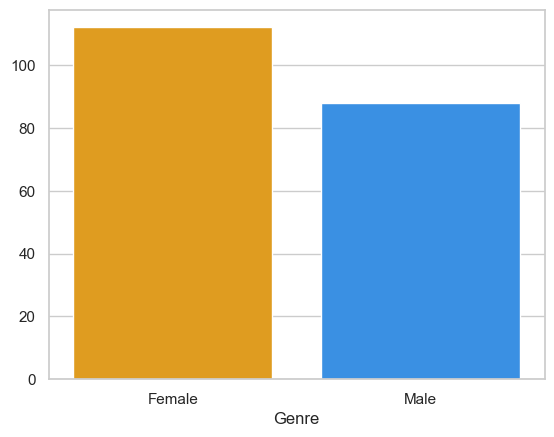

In [6]:
# Gender analysis
genders = df["Genre"].value_counts()
colors = {"Male": "dodgerblue", "Female": "orange"}
sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, hue=genders.index, palette=colors, legend=False)

plt.savefig('barplot.svg')
plt.show()


In [7]:
# Considering features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

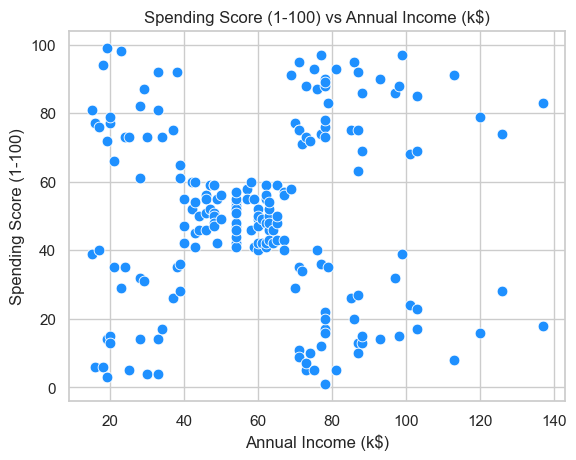

In [8]:
# Scatterplot of annual income vs spending score
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=X, s=60, color="dodgerblue")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.savefig('scatterplot.svg')
plt.show()

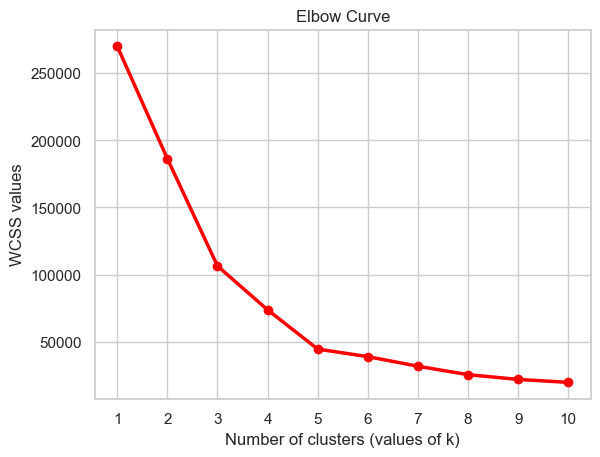

In [9]:
# Elbow curve for determining optimal cluster number
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="o")  # Adjusted marker
plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))
plt.savefig('plot.svg')
plt.show()

In [10]:
# K-Means clustering with 5 clusters
k_means_1 = KMeans(n_clusters=5, n_init="auto")
k_means_1.fit(X)

# Predict cluster labels for data points
y_pred = k_means_1.predict(X)


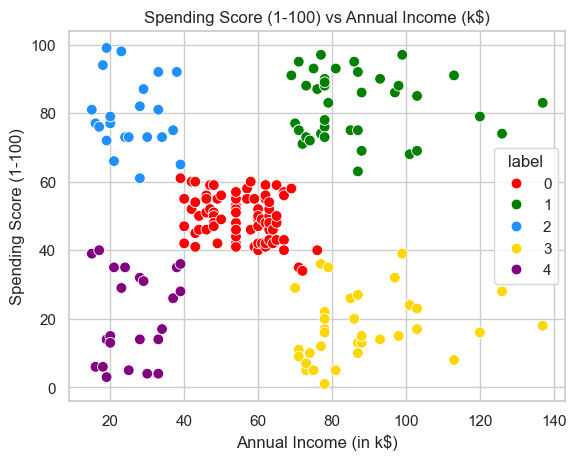

In [11]:
# Add cluster labels as a new column
df["label"] = y_pred

# Scatterplot with colors representing clusters
colors = ["red", "green", "dodgerblue", "gold", "purple"]
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="label", palette=colors, legend="full", data=df, s=60)
plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.savefig('scatterplot.svg')
plt.show()

F1 Score and Precision for each Cluster:
   Cluster  F1 Score  Precision
0        0       1.0        1.0
1        1       1.0        1.0
2        2       1.0        1.0
3        3       1.0        1.0
4        4       1.0        1.0


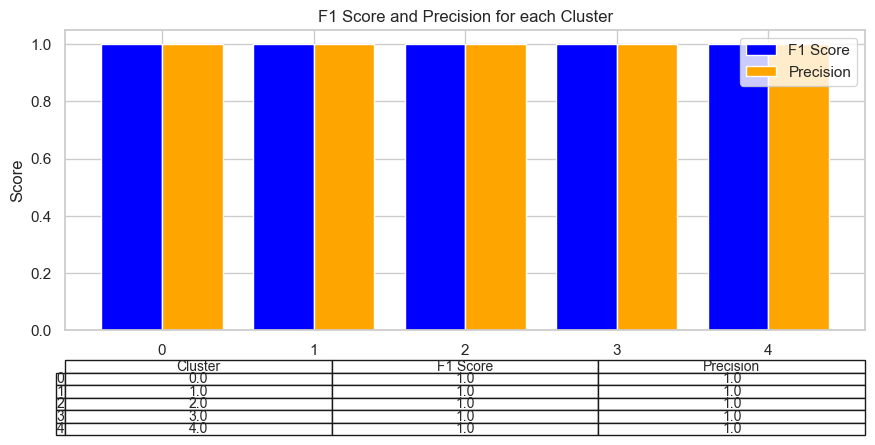

In [34]:
import matplotlib.pyplot as plt
from pandas.plotting import table

# Calculate F1 score and precision for each cluster
f1_scores = []
precisions = []

for i in range(5):
    cluster_data = df[df['label'] == i]
    true_labels = np.where(df['label'] == i, 1, 0)
    predicted_labels = np.where(y_pred == i, 1, 0)
    f1 = metrics.f1_score(true_labels, predicted_labels)
    precision = metrics.precision_score(true_labels, predicted_labels)
    f1_scores.append(f1)
    precisions.append(precision)

# Create a DataFrame to display F1 score and precision values
evaluation_df = pd.DataFrame({
    'Cluster': range(5),
    'F1 Score': f1_scores,
    'Precision': precisions
})

print("F1 Score and Precision for each Cluster:")
print(evaluation_df)

# Plot F1 Score and Precision for each Cluster
fig, ax = plt.subplots(figsize=(10, 6))

# Plot F1 Score and Precision for each Cluster
ax.bar(evaluation_df['Cluster'] - 0.2, evaluation_df['F1 Score'], width=0.4, color='blue', label='F1 Score')
ax.bar(evaluation_df['Cluster'] + 0.2, evaluation_df['Precision'], width=0.4, color='orange', label='Precision')
#ax.set_xlabel('Cluster')
ax.set_ylabel('Score')
ax.set_title('F1 Score and Precision for each Cluster')
ax.set_xticks(evaluation_df['Cluster'])  # Ensure correct column name and convert to lowercase if needed
ax.legend()

# Plot the table
tab = table(ax, evaluation_df, loc='bottom', cellLoc='center', bbox=[0, -0.35, 1, 0.25])
tab.auto_set_font_size(False)
tab.set_fontsize(10)

# Adjust layout to prevent overlapping
plt.subplots_adjust(left=0.1, bottom=0.3, right=0.9, top=0.8, wspace=0.2, hspace=0.2)

# Save the plot as SVG file
plt.savefig('evaluation_combined.svg', format='svg')

# Show the plot (optional)
plt.show()


In [35]:
import os
os.getcwd()


'C:\\Users\\HP\\Desktop\\Jupyter Notebook'